The material was taken from 
https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

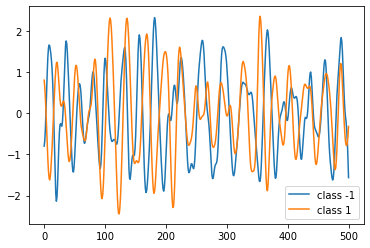

In [3]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [4]:
x_train.shape

(3601, 500)

In [5]:
x_train[:50]

array([[-0.79717168, -0.66439208, -0.37301463, ..., -0.66439208,
        -1.0737958 , -1.5643427 ],
       [ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
        -0.56044294, -0.31908642],
       [ 0.7279851 ,  0.11128392, -0.49912439, ...,  0.39446303,
         0.33940042,  0.25539062],
       ...,
       [ 1.8171308 ,  2.1273487 ,  2.0469218 , ..., -0.60256881,
         0.46021473,  1.4379756 ],
       [ 0.20497816,  0.3534353 ,  0.49427242, ..., -0.23082504,
        -0.31518976, -0.41988125],
       [-0.13597201, -0.16254914, -0.17572413, ...,  0.29107926,
         0.36831193,  0.39102743]])

In [6]:
import pandas as pd
pd.Series(y_train).unique()

array([-1,  1])

In [7]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [8]:
num_classes = len(np.unique(y_train))

In [9]:
x_train.shape

(3601, 500, 1)

In [10]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [11]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [13]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
# keras.utils.plot_model(model, show_shapes=True)

In [15]:
print("input shape: {}".format(x_train.shape[1:]))
print("x train shape: {}".format(x_train.shape))

input shape: (500, 1)
x train shape: (3601, 500, 1)


In [18]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Train on 2880 samples, validate on 721 samples
Epoch 1/500
2880/2880 [==============================] - 5s 2ms/sample - loss: 0.0860 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1144 - val_sparse_categorical_accuracy: 0.9612
Epoch 2/500
2880/2880 [==============================] - 1s 435us/sample - loss: 0.0741 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.1216 - val_sparse_categorical_accuracy: 0.9528
Epoch 3/500
2880/2880 [==============================] - 1s 431us/sample - loss: 0.0644 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.2448 - val_sparse_categorical_accuracy: 0.9015
Epoch 4/500
2880/2880 [==============================] - 1s 419us/sample - loss: 0.0864 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.2513 - val_sparse_categorical_accuracy: 0.8918
Epoch 5/500
2880/2880 [==============================] - 1s 447us/sample - loss: 0.0655 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0808 - val_sparse_categorical_accuracy: 0.9681
Epoch 6/500
2880/288

2880/2880 [==============================] - 1s 485us/sample - loss: 0.0482 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.1241 - val_sparse_categorical_accuracy: 0.9556
Epoch 45/500
2880/2880 [==============================] - 1s 448us/sample - loss: 0.0516 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1115 - val_sparse_categorical_accuracy: 0.9612
Epoch 46/500
2880/2880 [==============================] - 1s 463us/sample - loss: 0.0475 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0856 - val_sparse_categorical_accuracy: 0.9723
Epoch 47/500
2880/2880 [==============================] - 1s 495us/sample - loss: 0.0486 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9750
Epoch 48/500
2880/2880 [==============================] - 1s 497us/sample - loss: 0.0550 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.1361 - val_sparse_categorical_accuracy: 0.9417
Epoch 49/500
2880/2880 [==============================] - 1s 445us/sample

In [19]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1320/1320 [==============================] - 1s 981us/sample - loss: 0.0945 - sparse_categorical_accuracy: 0.9682
Test accuracy 0.9681818
Test loss 0.09450207166655948


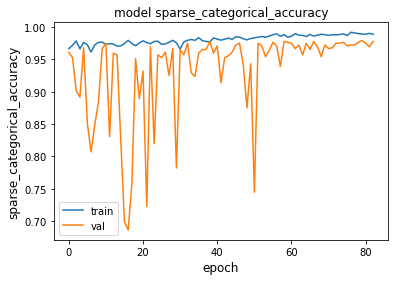

In [20]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()